In [207]:
import pandas as pd

ds = pd.read_csv (r'E:\MTech\2nd sem\ML\assignment-rw\FlightDelays.csv')
print (ds)

      CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE    FL_DATE  FL_NUM ORIGIN  \
0             1455      OH      1455  JFK       184   1/1/2004    5935    BWI   
1             1640      DH      1640  JFK       213   1/1/2004    6155    DCA   
2             1245      DH      1245  LGA       229   1/1/2004    7208    IAD   
3             1715      DH      1709  LGA       229   1/1/2004    7215    IAD   
4             1039      DH      1035  LGA       229   1/1/2004    7792    IAD   
...            ...     ...       ...  ...       ...        ...     ...    ...   
2196           645      RU       644  EWR       199  1/31/2004    2761    DCA   
2197          1700      RU      1653  EWR       213  1/31/2004    2497    IAD   
2198          1600      RU      1558  EWR       199  1/31/2004    2361    DCA   
2199          1359      RU      1403  EWR       199  1/31/2004    2216    DCA   
2200          1730      RU      1736  EWR       199  1/31/2004    2097    DCA   

      Weather  DAY_WEEK  DA

In [208]:
ds.FlightStatus.unique()

array(['ontime', 'delayed'], dtype=object)

In [209]:
ds.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FlightStatus
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


In [210]:
ds.shape

(2201, 13)

In [211]:
ds.isnull().values.any()

False

In [212]:
ds.isnull().sum()

CRS_DEP_TIME    0
CARRIER         0
DEP_TIME        0
DEST            0
DISTANCE        0
FL_DATE         0
FL_NUM          0
ORIGIN          0
Weather         0
DAY_WEEK        0
DAY_OF_MONTH    0
TAIL_NUM        0
FlightStatus    0
dtype: int64

In [213]:
ds = ds[["CRS_DEP_TIME", "DEP_TIME", "CARRIER", "ORIGIN", "DEST", "DISTANCE", "Weather", "DAY_WEEK", "DAY_OF_MONTH", "FL_NUM", "FlightStatus"]]
ds.isnull().sum()

CRS_DEP_TIME    0
DEP_TIME        0
CARRIER         0
ORIGIN          0
DEST            0
DISTANCE        0
Weather         0
DAY_WEEK        0
DAY_OF_MONTH    0
FL_NUM          0
FlightStatus    0
dtype: int64

In [214]:
ds.shape

(2201, 11)

In [215]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,CARRIER,ORIGIN,DEST,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,FL_NUM,FlightStatus
0,1455,1455,OH,BWI,JFK,184,0,4,1,5935,ontime
1,1640,1640,DH,DCA,JFK,213,0,4,1,6155,ontime
2,1245,1245,DH,IAD,LGA,229,0,4,1,7208,ontime
3,1715,1709,DH,IAD,LGA,229,0,4,1,7215,ontime
4,1039,1035,DH,IAD,LGA,229,0,4,1,7792,ontime


In [216]:
import math

for index, row in ds.iterrows():
    ds.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 88.8888888889)
ds.head()

,CRS_DEP_TIME,DEP_TIME,CARRIER,ORIGIN,DEST,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,FL_NUM,FlightStatus
0,16,1455,OH,BWI,JFK,184,0,4,1,5935,ontime
1,18,1640,DH,DCA,JFK,213,0,4,1,6155,ontime
2,14,1245,DH,IAD,LGA,229,0,4,1,7208,ontime
3,19,1709,DH,IAD,LGA,229,0,4,1,7215,ontime
4,11,1035,DH,IAD,LGA,229,0,4,1,7792,ontime


In [217]:
ds = pd.get_dummies(ds, columns=['ORIGIN', 'DEST'])
ds.head()

,CRS_DEP_TIME,DEP_TIME,CARRIER,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,FL_NUM,FlightStatus,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA
0,16,1455,OH,184,0,4,1,5935,ontime,1,0,0,0,1,0
1,18,1640,DH,213,0,4,1,6155,ontime,0,1,0,0,1,0
2,14,1245,DH,229,0,4,1,7208,ontime,0,0,1,0,0,1
3,19,1709,DH,229,0,4,1,7215,ontime,0,0,1,0,0,1
4,11,1035,DH,229,0,4,1,7792,ontime,0,0,1,0,0,1


In [218]:
ds = ds[["CRS_DEP_TIME", "DEP_TIME", "ORIGIN_BWI", "ORIGIN_DCA", "ORIGIN_IAD", "DEST_EWR", "DEST_JFK", "DEST_LGA", "Weather", "DAY_WEEK", "DAY_OF_MONTH", "FlightStatus"]]
ds.isnull().sum()

CRS_DEP_TIME    0
DEP_TIME        0
ORIGIN_BWI      0
ORIGIN_DCA      0
ORIGIN_IAD      0
DEST_EWR        0
DEST_JFK        0
DEST_LGA        0
Weather         0
DAY_WEEK        0
DAY_OF_MONTH    0
FlightStatus    0
dtype: int64

In [219]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,1455,1,0,0,0,1,0,0,4,1,ontime
1,18,1640,0,1,0,0,1,0,0,4,1,ontime
2,14,1245,0,0,1,0,0,1,0,4,1,ontime
3,19,1709,0,0,1,0,0,1,0,4,1,ontime
4,11,1035,0,0,1,0,0,1,0,4,1,ontime


In [220]:
import math

for index, row in ds.iterrows():
    ds.loc[index, 'DEP_TIME'] = math.floor(row['DEP_TIME'] / 88.8888888889)
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,16,1,0,0,0,1,0,0,4,1,ontime
1,18,18,0,1,0,0,1,0,0,4,1,ontime
2,14,14,0,0,1,0,0,1,0,4,1,ontime
3,19,19,0,0,1,0,0,1,0,4,1,ontime
4,11,11,0,0,1,0,0,1,0,4,1,ontime


In [221]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,16,1,0,0,0,1,0,0,4,1,ontime
1,18,18,0,1,0,0,1,0,0,4,1,ontime
2,14,14,0,0,1,0,0,1,0,4,1,ontime
3,19,19,0,0,1,0,0,1,0,4,1,ontime
4,11,11,0,0,1,0,0,1,0,4,1,ontime


In [222]:
ds.shape

(2201, 12)

In [223]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,16,1,0,0,0,1,0,0,4,1,ontime
1,18,18,0,1,0,0,1,0,0,4,1,ontime
2,14,14,0,0,1,0,0,1,0,4,1,ontime
3,19,19,0,0,1,0,0,1,0,4,1,ontime
4,11,11,0,0,1,0,0,1,0,4,1,ontime


In [224]:
ds.FlightStatus.replace(r'ontime','3')
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,16,1,0,0,0,1,0,0,4,1,ontime
1,18,18,0,1,0,0,1,0,0,4,1,ontime
2,14,14,0,0,1,0,0,1,0,4,1,ontime
3,19,19,0,0,1,0,0,1,0,4,1,ontime
4,11,11,0,0,1,0,0,1,0,4,1,ontime


In [225]:
ds.FlightStatus.unique()

array(['ontime', 'delayed'], dtype=object)

In [226]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,16,1,0,0,0,1,0,0,4,1,ontime
1,18,18,0,1,0,0,1,0,0,4,1,ontime
2,14,14,0,0,1,0,0,1,0,4,1,ontime
3,19,19,0,0,1,0,0,1,0,4,1,ontime
4,11,11,0,0,1,0,0,1,0,4,1,ontime


In [227]:
dmFS = pd.get_dummies(ds['FlightStatus'])

In [228]:
dmFS.head()

,delayed,ontime
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [229]:
ds=pd.concat((ds, dmFS), axis=1)

In [230]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus,delayed,ontime
0,16,16,1,0,0,0,1,0,0,4,1,ontime,0,1
1,18,18,0,1,0,0,1,0,0,4,1,ontime,0,1
2,14,14,0,0,1,0,0,1,0,4,1,ontime,0,1
3,19,19,0,0,1,0,0,1,0,4,1,ontime,0,1
4,11,11,0,0,1,0,0,1,0,4,1,ontime,0,1


In [231]:
ds.drop(['FlightStatus'], axis=1)

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,delayed,ontime
0,16,16,1,0,0,0,1,0,0,4,1,0,1
1,18,18,0,1,0,0,1,0,0,4,1,0,1
2,14,14,0,0,1,0,0,1,0,4,1,0,1
3,19,19,0,0,1,0,0,1,0,4,1,0,1
4,11,11,0,0,1,0,0,1,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,7,7,0,1,0,1,0,0,0,6,31,0,1
2197,19,18,0,0,1,1,0,0,0,6,31,0,1
2198,17,17,0,1,0,1,0,0,0,6,31,0,1
2199,15,15,0,1,0,1,0,0,0,6,31,0,1


In [232]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus,delayed,ontime
0,16,16,1,0,0,0,1,0,0,4,1,ontime,0,1
1,18,18,0,1,0,0,1,0,0,4,1,ontime,0,1
2,14,14,0,0,1,0,0,1,0,4,1,ontime,0,1
3,19,19,0,0,1,0,0,1,0,4,1,ontime,0,1
4,11,11,0,0,1,0,0,1,0,4,1,ontime,0,1


In [233]:
ds = ds.drop(['FlightStatus'], axis=1)

In [234]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,delayed,ontime
0,16,16,1,0,0,0,1,0,0,4,1,0,1
1,18,18,0,1,0,0,1,0,0,4,1,0,1
2,14,14,0,0,1,0,0,1,0,4,1,0,1
3,19,19,0,0,1,0,0,1,0,4,1,0,1
4,11,11,0,0,1,0,0,1,0,4,1,0,1


In [235]:
ds = ds.drop(['delayed'], axis=1)

In [236]:
ds

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,ontime
0,16,16,1,0,0,0,1,0,0,4,1,1
1,18,18,0,1,0,0,1,0,0,4,1,1
2,14,14,0,0,1,0,0,1,0,4,1,1
3,19,19,0,0,1,0,0,1,0,4,1,1
4,11,11,0,0,1,0,0,1,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,7,7,0,1,0,1,0,0,0,6,31,1
2197,19,18,0,0,1,1,0,0,0,6,31,1
2198,17,17,0,1,0,1,0,0,0,6,31,1
2199,15,15,0,1,0,1,0,0,0,6,31,1


In [237]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,ontime
0,16,16,1,0,0,0,1,0,0,4,1,1
1,18,18,0,1,0,0,1,0,0,4,1,1
2,14,14,0,0,1,0,0,1,0,4,1,1
3,19,19,0,0,1,0,0,1,0,4,1,1
4,11,11,0,0,1,0,0,1,0,4,1,1


In [238]:
ds=ds.rename(columns={"ontime":"FlightStatus"})

In [239]:
ds.head()

,CRS_DEP_TIME,DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,16,1,0,0,0,1,0,0,4,1,1
1,18,18,0,1,0,0,1,0,0,4,1,1
2,14,14,0,0,1,0,0,1,0,4,1,1
3,19,19,0,0,1,0,0,1,0,4,1,1
4,11,11,0,0,1,0,0,1,0,4,1,1


In [240]:
ds = ds[["CRS_DEP_TIME", "ORIGIN_BWI", "ORIGIN_DCA", "ORIGIN_IAD", "DEST_EWR", "DEST_JFK", "DEST_LGA", "Weather", "DAY_WEEK", "DAY_OF_MONTH", "FlightStatus"]]
ds.isnull().sum()

CRS_DEP_TIME    0
ORIGIN_BWI      0
ORIGIN_DCA      0
ORIGIN_IAD      0
DEST_EWR        0
DEST_JFK        0
DEST_LGA        0
Weather         0
DAY_WEEK        0
DAY_OF_MONTH    0
FlightStatus    0
dtype: int64

In [241]:
ds.head()

,CRS_DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,DAY_WEEK,DAY_OF_MONTH,FlightStatus
0,16,1,0,0,0,1,0,0,4,1,1
1,18,0,1,0,0,1,0,0,4,1,1
2,14,0,0,1,0,0,1,0,4,1,1
3,19,0,0,1,0,0,1,0,4,1,1
4,11,0,0,1,0,0,1,0,4,1,1


In [242]:
ds = ds[["DAY_WEEK", "DAY_OF_MONTH", "CRS_DEP_TIME", "ORIGIN_BWI", "ORIGIN_DCA", "ORIGIN_IAD", "DEST_EWR", "DEST_JFK", "DEST_LGA", "Weather", "FlightStatus"]]
ds.isnull().sum()

DAY_WEEK        0
DAY_OF_MONTH    0
CRS_DEP_TIME    0
ORIGIN_BWI      0
ORIGIN_DCA      0
ORIGIN_IAD      0
DEST_EWR        0
DEST_JFK        0
DEST_LGA        0
Weather         0
FlightStatus    0
dtype: int64

In [243]:
ds.head()

,DAY_WEEK,DAY_OF_MONTH,CRS_DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather,FlightStatus
0,4,1,16,1,0,0,0,1,0,0,1
1,4,1,18,0,1,0,0,1,0,0,1
2,4,1,14,0,0,1,0,0,1,0,1
3,4,1,19,0,0,1,0,0,1,0,1
4,4,1,11,0,0,1,0,0,1,0,1


In [244]:
ds.FlightStatus.unique()

array([1, 0], dtype=uint8)

In [245]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(ds.drop('FlightStatus', axis=1), ds['FlightStatus'], test_size=0.4, random_state=42)

In [246]:
train_x.shape

(1320, 10)

In [247]:
test_x.shape

(881, 10)

In [248]:
train_y.shape

(1320,)

In [249]:
test_y.shape

(881,)

In [250]:
test_x.head()

,DAY_WEEK,DAY_OF_MONTH,CRS_DEP_TIME,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DEST_EWR,DEST_JFK,DEST_LGA,Weather
780,1,12,13,0,1,0,0,0,1,0
581,5,9,16,0,1,0,0,0,1,0
1750,7,25,13,0,1,0,0,0,1,0
1842,1,26,19,0,1,0,0,0,1,0
952,3,14,17,0,1,0,0,0,1,0


In [251]:
test_y.head()

780     1
581     1
1750    1
1842    1
952     0
Name: FlightStatus, dtype: uint8

In [252]:
print(train_x)

      DAY_WEEK  DAY_OF_MONTH  CRS_DEP_TIME  ORIGIN_BWI  ORIGIN_DCA  \
520          4             8            11           0           1   
1263         7            18             9           0           0   
208          7             4            16           1           0   
1644         5            23             7           0           1   
881          2            13            15           0           1   
...        ...           ...           ...         ...         ...   
1638         5            23            14           0           1   
1095         5            16             7           0           1   
1130         5            16            15           0           1   
1294         1            19             7           0           1   
860          2            13             9           0           1   

      ORIGIN_IAD  DEST_EWR  DEST_JFK  DEST_LGA  Weather  
520            0         0         0         1        0  
1263           1         1         0       

In [253]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=13)

In [254]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7979568671963677

In [255]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [256]:
roc_auc_score(test_y, probabilities[:, 1])

0.7224225438761385

In [257]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[ 55, 108],
       [ 70, 648]], dtype=int64)

In [258]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.972922502334267

In [259]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9876777251184834

In [260]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [261]:
def predict_delay(dep_date_time, origin, destination, wth):
    from datetime import datetime

    try:
        dep_date_time_parsed = datetime.strptime(dep_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)
    
    day_month = dep_date_time_parsed.day                   
    day_of_week = dep_date_time_parsed.isoweekday()     
    hour = dep_date_time_parsed.hour                    

    origin = origin.upper()
    destination = destination.upper()

    input = [{'DAY_OF_WEEK': day_of_week, 'DAY_OF_MONTH': day_month, 'CRS_DEP_TIME': hour,
              
              'ORIGIN_BWI': 1 if origin == 'BWI' else 0,
              'ORIGIN_DCA': 1 if origin == 'DCA' else 0,
              'ORIGIN_IAD': 1 if origin == 'IAD' else 0,
              
              'DEST_EWR': 1 if destination == 'EWR' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_LGA': 1 if destination == 'LGA' else 0,
              
              'Weather': 1 if wth == 1 else 0
              
               }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [262]:
predict_delay('02/01/2004 15:15:00', 'IAD', 'EWR', 0)

0.5616666666666666

In [264]:
predict_delay('30/01/2004 14:55:00', 'JFK', 'EWR', 0)

0.3741666666666667

In [265]:
predict_delay('30/01/2004 14:55:00', 'JFK', 'EWR', 1)

0.7933333333333333

(0.0, 1.0)

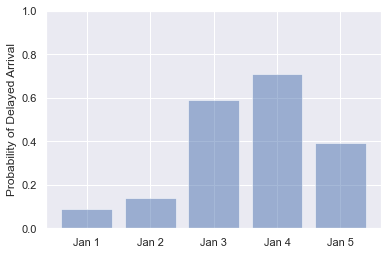

In [266]:
import numpy as np

labels = ('Jan 1', 'Jan 2', 'Jan 3', 'Jan 4', 'Jan 5',)
values = (predict_delay('1/1/2004 21:20:00', 'BWI', 'JFK', 0),
          predict_delay('2/1/2004 21:20:00', 'BWI', 'JFK', 0),
          predict_delay('3/1/2004 21:20:00', 'BWI', 'JFK', 1),
          predict_delay('4/1/2004 21:20:00', 'BWI', 'JFK', 1),
          predict_delay('5/1/2004 21:20:00', 'BWI', 'JFK', 0))

alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of Delayed Arrival')
plt.ylim((0.0, 1.0))